<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Pilot/week2/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Pilot Project Week2
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”
> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리 ✅

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [133]:
raw_data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/CC GENERAL.csv')
data = raw_data.copy()
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 1️⃣ 컬럼 제거

object 컬럼인 CUST_ID는 삭제

In [134]:
data = data.drop(columns=['CUST_ID'])

## 2️⃣ 결측치 처리

### 결측치 확인

In [135]:
data.isnull().mean()

,0
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
CASH_ADVANCE_FREQUENCY,0.000000


✅ 결측치 있는 컬럼
* `CREDIT_LIMIT`
* `MINIMUM_PAYMENTS`

### 회귀 대체(regression imputation)
결측치가 존재하는 컬럼이 두 개 이상이므로 여러 개 컬럼을 순차적으로 대체하는 `IterativeImputer(sklearn)` 사용

In [136]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
data_imputed = imputer.fit_transform(data) # numpy.ndarray 형태의 2차원 배열

data = pd.DataFrame(                       # df 형태로 변환
    data_imputed,
    columns=data.columns,
    index=data.index
)

In [137]:
data.isnull().mean()

,0
BALANCE,0.0
BALANCE_FREQUENCY,0.0
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0
CASH_ADVANCE_FREQUENCY,0.0


*결측치 처리 완료!*

## 3️⃣ 피처 엔지니어링 (Feature Engineering)

### `real_pay_ratio` : 구매액 대비 실제 납부액 비율
> PAYMENTS / PURCHASES

**📊 해석 포인트**
> 비율 ≈ 1 (납부액 ≈ 구매액)

* 고객이 구매한 만큼 제때 결제한다는 의미.
* 신용카드 사용 패턴이 정상적이고 건전한 경우.
* 리스크가 낮은 고객으로 분류 가능.

> 비율 < 1 (납부액 < 구매액)

* 이번 기간 구매액에 비해 실제 납부액이 적다 = 연체 가능성, 최소 결제만 이행.
* 신용 위험이 높거나, 카드사 입장에서는 이자 수익이 발생하는 집단일 수도 있음.
* 소비는 활발하지만 갚는 능력이 떨어지는 고객 → 리스크 관리 필요.

> 비율 > 1 (납부액 > 구매액)

* 이번 기간 구매액보다 더 많이 상환했다는 의미.
* 해석 1: 과거의 미결제 잔액을 이번에 갚음 (할부, 이전달 사용액 상환).
* 해석 2: 현금서비스(Cash Advance) 상환액이 포함된 경우.
* 즉, 단순히 이번 달 사용액과 연결하기보다 “누적 부채 상환”의 의미가 큼.

> 구매액 = 0, 납부액 > 0

* 이번 달엔 새로 구매하지 않았지만 과거 부채 상환 중.
* 0으로 처리

> 구매액 > 0, 납부액 = 0
* 신규 사용 but 미납 (연체 위험)
* 이번 기간에 구매는 했는데 납부는 전혀 하지 않은 경우.
* 카드사 입장에서는 연체 가능성이 큰 신호.

In [ ]:
data['real_pay'] = np.where(
    (data['PURCHASES'] == 0) & (data['PAYMENTS'] == 0),  # 둘 다 0이면
    1,
    np.where(
        data['PURCHASES'] == 0,                          # 구매만 0이면
        0,
        data['PAYMENTS'] / data['PURCHASES']             # 그 외는 비율 계산
    )
)

### `risk`: 리스크 지수 (Risk Index)
> (현금서비스 비율 + 최소결제 비율 + 신용한도 사용률) 조합

**📊 해석 포인트**

⬆️ 높을수록:

현금서비스에 의존하고, 최소 결제만 하며, 신용한도까지 많이 사용한다

→ 재정적 압박이 크고 연체 가능성이 높은 집단.

⬇️ 낮을수록:

현금서비스 거의 안 쓰고, 결제는 전액 상환하며, 신용한도도 있게 관리 →
건전한 신용 행태.

In [140]:
data['risk'] = data['CASH_ADVANCE_FREQUENCY'] + data['MINIMUM_PAYMENTS'] + data['CREDIT_LIMIT']

In [141]:
data['risk'].head(10)

,risk
0,1139.509787
1,8072.590217
2,8127.284787
3,7931.303960
4,1444.791237
5,4207.246035
6,13698.065894
7,2832.033990
8,7311.963409
9,11100.302262


### `overpay` : 초과 납부 여부 (양수 = 카드대금보다 많이 낸 고객, 음수 = 미납 가능성)
> PAYMENTS - PURCHASES

In [142]:
data['overpay'] = data['PAYMENTS'] - data['PURCHASES']

In [143]:
data['overpay'].head(10)

,overpay
0,106.402084
1,4103.032597
2,-151.103258
3,-1499.000000
4,662.334763
5,66.777770
6,-736.695672
7,242.865082
8,-173.211432
9,-116.829409


In [144]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,loyalty,risk,overpay
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0,1139.509787,106.402084
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0,8072.590217,4103.032597
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,8127.284787,-151.103258
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220627,0.000000,12.0,0.0,7931.303960,-1499.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0,1444.791237,662.334763
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.0,4207.246035,66.777770
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,12.0,13698.065894,-736.695672
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,0.0,2832.033990,242.865082
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0.0,7311.963409,-173.211432
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0.0,11100.302262,-116.829409


## 4️⃣ 스케일링

거리 기반 알고리즘인 군집화를 사용하기 때문에 컬럼 간 스케일 차이가 클 경우 학습이 제대로 되지 않을 수 있음

이상치가 중요한 금융 데이터 특성상, 이상치에 민감한 MinMaxScaler나 StandardScaler는 위험할 수 있음
➡️ **RobustScaler** 사용

✅ **RobustScaler**

특징
* 이상치에 둔감
→ 따라서 RobustScaler는 이상치가 많은 데이터에 적합.

* 스케일링 후 분포
> 대부분의 값이 -1 ~ 1 근처에 위치하지만, 정확히 [-1, 1]로 한정되지는 않음. (MinMaxScaler처럼 범위 고정이 아님)

* 변환 결과
> 중앙값: 0으로 이동
>
> 사분위수 범위: 1 단위로 맞춤 (즉, 데이터의 “중간 50% 구간”이 -0.5 ~ +0.5 사이쯤 분포)

In [145]:
# TENURE만 제외
scale_cols = data.columns.drop('TENURE')

# RobustScaler 적용
scaler = RobustScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [146]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,loyalty,risk,overpay
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.254399,0.000000,12.0,0.000000,-0.556302,-0.128699
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.208553,1.555556,12.0,0.000000,0.799752,4.154003
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.510575,0.000000,12.0,0.000000,0.810450,-0.404636
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.203089,0.000000,12.0,0.000000,0.772117,-1.849012
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.089287,0.000000,12.0,0.000000,-0.496591,0.467027
5,0.486247,0.000000,0.907991,-0.065812,2.655101,0.000000,0.200000,-0.277777,0.555555,0.000000,0.00,0.0625,-0.244898,0.357844,3.302079,0.000000,12.0,0.000000,0.043722,-0.171159
6,-0.127800,0.000000,6.286559,11.022818,1.278984,0.000000,0.600000,3.055557,1.111111,0.000000,0.00,3.5625,2.142857,3.621822,-0.162566,7.000007,12.0,14.666681,1.900048,-1.032144
7,0.493426,0.000000,0.069986,-0.065812,0.740871,0.000000,0.600000,-0.277777,1.111111,0.000000,0.00,0.3125,-0.142857,-0.117163,0.361194,0.000000,12.0,0.000000,-0.225258,0.017532
8,0.073495,0.000000,0.467270,1.079814,0.236857,0.000000,-0.200000,0.000000,0.111111,0.000000,0.00,-0.1250,0.816327,-0.111093,0.016059,0.000000,12.0,0.000000,0.650979,-0.428326
9,-0.374461,-4.090909,0.859714,2.153774,-0.189912,0.000000,-0.399999,0.277780,-0.222223,0.000000,0.00,-0.2500,1.632653,0.202831,-0.315888,0.000000,12.0,0.000000,1.391947,-0.367909


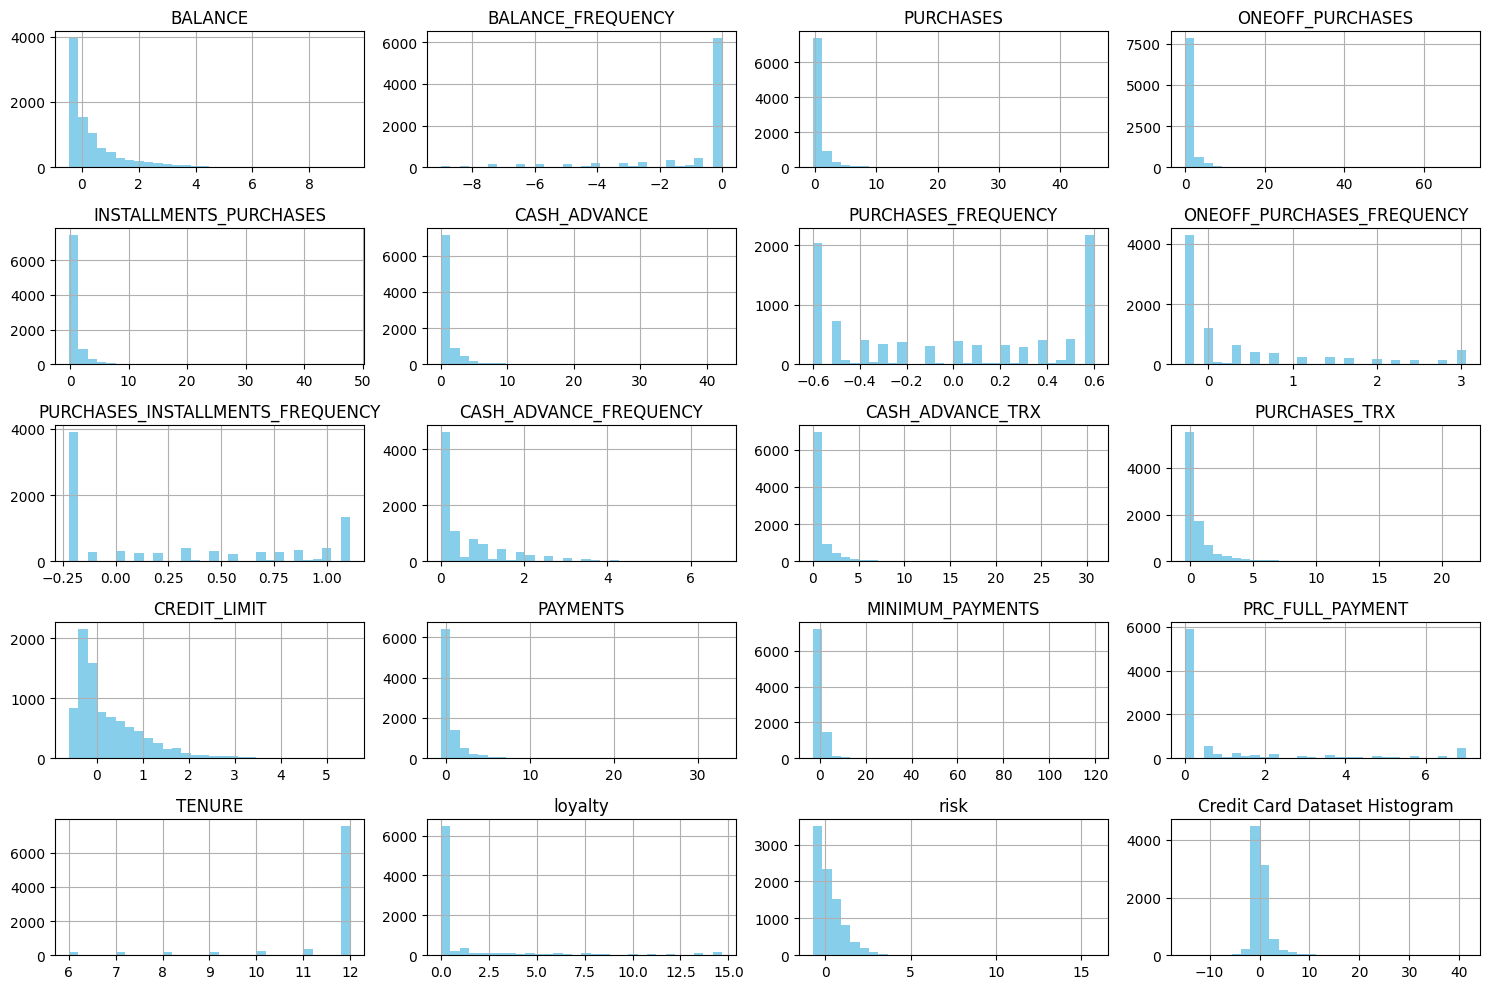

In [150]:
data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.title('Credit Card Dataset Histogram')
plt.tight_layout()
plt.show()

*이상치가 중요한 역할을 할 수도 있어 로그 변환은 일단 보류,,*